In [193]:
import json
import matplotlib.pyplot as plt
import numpy as np
import openturns as ot
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns

from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap

## Load the data

In [130]:
%%bash
# List the .csv files that are possible to analyze.
ls *.xlsx

ratio2016.xlsx


In [131]:
# Load the data
df = pd.ExcelFile('./ratio2016.xlsx')
df = df.parse(1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Somme de Montant sans marge,NaN,Étiquettes de colonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Veh,Étiquettes de lignes,Moyenne de Véhicules livrés,0,1.00,2.00,3.00,4.00,5.00,6.00,...,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,Total général
3,B07,janv,5295,5788.58,14456.24,8393.49,15095.32,18716.35,23320.35,13869.60,...,21485.13,24445.50,12079.09,12956.00,15145.92,15962.22,12551.03,19266.41,30672.31,396629
4,B07,févr,6349,4533.85,16406.10,21111.54,31900.58,52078.62,35965.48,34681.44,...,34113.15,24655.94,27934.80,18334.36,22485.92,17556.94,20878.07,20436.76,26487.07,648986
5,B07,mars,9116,11403,24669.33,47121.93,67398.69,63725.69,74499.91,46929.49,...,42300.85,30826.49,28970.67,24576.78,24157.43,30074.75,29220.35,27359.06,50087.72,1.03799e+06
6,B07,avr,6714,3878.15,10690.78,10779.76,19711.54,16616.39,16553.35,11102.17,...,22575.90,21670.06,18476.79,19835.82,25924.00,19660.57,18101.93,19312.03,23650.19,433750
7,B07,mai,6096,5614.68,16719.24,22626.94,13655.55,10845.05,11591.06,13893.22,...,18480.27,12314.65,14633.09,14478.84,14852.40,18467.05,18316.62,14743.46,25642.59,398047
8,B07,juin,8122,4789.08,17987.95,16694.29,16397.98,12011.38,12399.96,15589.27,...,15621.66,18003.80,18574.57,19721.13,21237.89,17212.39,15257.85,17816.59,24508.36,418021
9,B07,juil,5828,2533.1,11203.40,9867.10,14820.64,15401.00,13528.44,13282.33,...,7191.18,15267.10,10735.60,13002.92,9783.11,13100.26,11773.01,11722.57,18641.98,302394


In [179]:
df_ex = df[3:-3]
df_ex = df_ex.drop(['Unnamed: 1'],axis = 1)
df_ex = df_ex.drop(['Unnamed: 2'],axis =1)
df_ex = df_ex.drop(['Unnamed: 28'],axis =1)
df_ex.set_index('Unnamed: 0', inplace=True, drop=True)


L = [i for i in range(25)]
df_ex.columns = L
df_ex = df_ex.cumsum(axis = 1)
df_ex

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
B07,5788.58,20244.8,28638.3,43733.6,62450,85770.3,99639.9,115725,128878,138978,...,232065,253550,277996,290075,303031,318177,334139,346690,365956,396629
B07,4533.85,20939.9,42051.5,73952.1,126031,161996,196678,224586,243683,266312,...,436103,470217,494872,522807,541142,563628,581185,602063,622499,648986
B07,11403,36072.3,83194.2,150593,214319,288819,335748,381657,409311,435495,...,750413,792714,823540,852511,877088,901245,931320,960540,987899,1.03799e+06
B07,3878.15,14568.9,25348.7,45060.2,61676.6,78230,89332.1,98303.9,108565,125983,...,244543,267119,288789,307266,327101,353025,372686,390788,410100,433750
B07,5614.68,22333.9,44960.9,58616.4,69461.5,81052.5,94945.7,112765,126715,140283,...,246118,264598,276913,291546,306025,320877,339344,357661,372404,398047
B07,4789.08,22777,39471.3,55869.3,67880.7,80280.6,95869.9,111810,133373,154197,...,250067,265689,283693,302267,321988,343226,360439,375696,393513,418021
B07,2533.1,13736.5,23603.6,38424.2,53825.2,67353.7,80636,89072,100475,109233,...,191176,198367,213634,224370,237373,247156,260256,272029,283752,302394
B07,260.29,3429.65,6593.75,9108.18,11586,15579.9,18000,23188.3,25167.6,27720.6,...,52494.3,54887.4,58708.2,60418.3,65600.5,69489.5,71692,76933.5,80846.4,86782.8
B07,4656,10501.3,16853.1,21729.8,28132.5,38754.9,43001.7,46548.7,49889.2,58225,...,103084,111000,115798,120795,127688,133290,137074,142125,149850,158404


In [180]:
df_ex.index

Index(['B07', 'B07', 'B07', 'B07', 'B07', 'B07', 'B07', 'B07', 'B07', 'B10',
       ...
       'LFD', 'LFD', 'LFD', 'U62', 'U62', 'U62', 'U62', 'U62', 'U62', 'U62'],
      dtype='object', name='Unnamed: 0', length=222)

In [181]:
from collections import OrderedDict
dict = OrderedDict.fromkeys(df_ex.index.values)
dict

OrderedDict([('B07', None),
             ('B10', None),
             ('B52', None),
             ('B53', None),
             ('B54', None),
             ('B55', None),
             ('B56', None),
             ('B57', None),
             ('B58', None),
             ('B59', None),
             ('B60', None),
             ('B98', None),
             ('BFB', None),
             ('D95', None),
             ('E62', None),
             ('F61', None),
             ('F62', None),
             ('F67', None),
             ('F82', None),
             ('H79', None),
             ('HFE', None),
             ('J82', None),
             ('J87', None),
             ('J92', None),
             ('J95', None),
             ('JFA', None),
             ('JFC', None),
             ('K52', None),
             ('K61', None),
             ('K67', None),
             ('K95', None),
             ('K98', None),
             ('KFB', None),
             ('KFD', None),
             ('L38', None),
             ('L52',

## Extraction des données pour le véhicule B07:

In [184]:
def extract(df,name,n,m):
    return df.loc[name][[n,m]]

In [188]:
df_v = extract(df_ex,'B07',3,6)
df_v

,3,6
Unnamed: 0,,
B07,43733.6,99639.9
B07,73952.1,196678
B07,150593,335748
B07,45060.2,89332.1
B07,58616.4,94945.7
B07,55869.3,95869.9
B07,38424.2,80636
B07,9108.18,18000
B07,21729.8,43001.7


In [189]:
def list_ratio(df,n,m):
    R = []
    for index,row in df.iterrows():
        R.append(row[m]/row[n])
    return R
 
L =list_ratio(df_v,3,6)
print(L)

[2.278336602747131, 2.65952812409443, 2.2295071886840905, 1.9825051936042046, 1.61978087706156, 1.7159676244377504, 2.0985713705723263, 1.976248822487039, 1.9789239226225674]


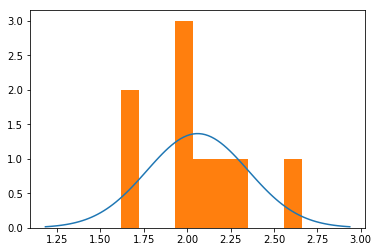

(2.059929969590122, 0.08545215821068515)

In [198]:
def plot_histo(L):
    l_mean = np.mean(L)
    l_var = np.var(L)
    sigma = np.sqrt(l_var)
    N = np.linspace(l_mean-3*sigma,l_mean+3*sigma,100)
    plt.plot(N, stats.norm.pdf(N, l_mean, sigma))
    plt.hist(L)
    plt.show()
    return l_mean,l_var

plot_histo(L)

In [173]:
def ratio_all_v(df,n,m):
    K = []
    for key in dict.keys():
        print(key)
        df_v = extract(df,key,n,m)
        L = list_ratio(df_v,n,m)
        K.extend(L)
        print(K)
    return K

K = ratio_all_v(df_ex,3,6)

B07
[2.278336602747131, 2.65952812409443, 2.2295071886840905, 1.9825051936042046, 1.61978087706156, 1.7159676244377504, 2.0985713705723263, 1.976248822487039, 1.9789239226225674]
B10
[2.278336602747131, 2.65952812409443, 2.2295071886840905, 1.9825051936042046, 1.61978087706156, 1.7159676244377504, 2.0985713705723263, 1.976248822487039, 1.9789239226225674, 1.6929453762059905, 1.6404752281451094, 1.9920060336762317, 2.4697122530946856, 2.3685019930697586, 1.8954213267839857, 2.006346144025024, 2.0042575256791597]
B52


ValueError: No axis named 1 for object type <class 'type'>